# Predicting Christmas Movie Grossings

## 📖 Background

Imagine harnessing the power of data science to unveil the hidden potential of movies before they even hit the silver screen! As a data scientist at a forward-thinking cinema, you're at the forefront of an exhilarating challenge: crafting a cutting-edge system that doesn't just predict movie revenues, but reshapes the entire landscape of cinema profitability. This isn't just about numbers; it's about blending art with analytics to revolutionize how movies are marketed, chosen, and celebrated.

Your mission? To architect a predictive model that dives deep into the essence of a movie - from its title and running time to its genre, captivating description, and star-studded cast. And what better way to sprinkle some festive magic on this project than by focusing on a dataset brimming with Christmas movies? A highly-anticipated Christmas movie is due to launch soon, but the cinema has some doubts. It wants you to predict its success, so it can decide whether to go ahead with the screening or not. It's a unique opportunity to blend the cheer of the holiday season with the rigor of data science, creating insights that could guide the success of tomorrow's blockbusters. Ready to embark on this cinematic adventure?



## 💾 The data

We're providing you with a dataset of 788 Christmas movies, with the following columns:

* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

You may also use an additional dataset of 1000 high-rated movies, with the following columns:

* `imdb_top1k.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the ratig/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

Finally you have access to a dataset of movie production budgets for over 6,000 movies, with the following columns:

* `movie_budgets.csv`

| Variable            | Meaning                         |
|---------------------|---------------------------------|
| `year`              | year the movie was released     |
| `date`              | date the movie was released     |
| `title`             | title of the movie              |
| `production budget` | production budget in US dollars |


**Note: while you may augment the Christmas movies with the general movie data, the model should be developed to predict ratings of Christmas movies only.**

## 💪 Competition challenge

Create a report that covers the following:
1. Exploratory data analysis of the dataset with informative plots. It's up to you what to include here! Some ideas could include:
    * Analysis of the genres
    * Descriptive statistics and histograms of the grossings
    * Word clouds
2. Develop a model to predict the movie's domestic gross based on the available features.
     * Remember to preprocess and clean the data first.
     * Think about what features you could define (feature engineering), e.g.:
       * _number of times a director appeared in the top 1000 movies list_,
       * _highest grossing for lead actor(s)_,
       * _decade released_
3. Evaluate your model using appropriate metrics.
4. Explain some of the limitations of the models you have developed. What other data might help improve the model?
5. Use your model to predict the grossing of the following fictitious Christmas movie:

**Title**: The Magic of Bellmonte Lane

**Description**:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:
- Emma Thompson as Emily, a kind-hearted and curious woman
- Ian McKellen as Mr. Grayson, the stern corporate developer
- Tom Hanks as George, the wise and elderly owner of the local cafe
- Zoe Saldana as Sarah, Emily's supportive best friend
- Jacob Tremblay as Timmy, a young boy with a special Christmas wish

**Runtime**: 105 minutes

**Genres**: Family, Fantasy, Romance, Holiday

**Production budget**: $25M



# **Executive Summary:**

**The developed model successfully predicts the gross revenue of Christmas movies based on relevant features such as release year, runtime, release decade, director influence, and lead actor's maximum budget. The model has been trained and evaluated using existing Christmas movie data augmented with general movie information. It is important to note that the model is tailored specifically for Christmas movies.**

**Key Recommendations:**

1. **Model Performance:**
   - The model demonstrates reasonable predictive capabilities, producing a predicted gross of $73.51 million for "The Magic of Bellmonte Lane."

2. **Interpretation of Predictions:**
   - The predicted value aligns with the order of magnitude of actual gross values in the provided dataset.
   - Consider the context of Christmas movies and their typical box office performance during the holiday season.

3. **Model Limitations:**
   - Acknowledge the inherent challenges in predicting exact box office numbers.
   - The model relies on available features and may not capture all nuances influencing box office success.

4. **Further Considerations:**
   - Industry expertise and additional context about the specific genre (Christmas movies) can enhance the interpretation of predictions.
   - Continuous model refinement and validation with new data are recommended for improved accuracy.

## **Conclusion:**

**The model offers valuable insights into predicting the gross revenue of Christmas movies, providing a useful tool for decision-making in the film industry. While the predicted value for "The Magic of Bellmonte Lane" is within a reasonable range, it is crucial to approach predictions with caution, considering the dynamic nature of the movie industry and the uniqueness of each film. Continuous monitoring, refinement, and validation of the model will contribute to its ongoing effectiveness.**


# **1.Data Exploration and Cleaning:**

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Christmas Movies dataset(christmas_movies.csv')**

In [32]:
# Load the Christmas Movies dataset
xmas_movies = pd.read_csv('data/christmas_movies.csv')

# Display the first few rows of the dataset
xmas_movies.head()


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M


### **IMDb Top 1000 Movies Dataset (imdb_top1k.csv):**

In [33]:
# Load IMDb Top 1000 Movies dataset
imdb_top1k = pd.read_csv('data/imdb_top1k.csv')

# Display the first few rows of the dataset
imdb_top1k.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


### **Movie Production Budgets Dataset (movie_budgets.csv):**

In [34]:
# Load Movie Production Budgets dataset
movie_budgets = pd.read_csv('data/movie_budgets.csv')

# Display the first few rows of the dataset
movie_budgets.head()


,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000


## ****let's** start by  checking information about our datasets**

In [35]:
#Christmas Movies dataset information
print('Christmas Movies dataset information below')
print(' ')
print(' ')
xmas_movies.info()
print(' ')
print(' ')

#IMDb Top 1000 Movies dataset information
print('IMDb Top 1000 Movies dataset information below')
print(' ')
print(' ')
imdb_top1k.info()
print(' ')
print(' ')

#Movie Production Budgets dataset information
print('Movie Production Budgets dataset information below')
print(' ')
print(' ')
movie_budgets.info()

Christmas Movies dataset information below
 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         788 non-null    object 
 1   release_year  780 non-null    float64
 2   description   788 non-null    object 
 3   type          788 non-null    object 
 4   rating        646 non-null    object 
 5   runtime       749 non-null    float64
 6   imdb_rating   749 non-null    float64
 7   genre         787 non-null    object 
 8   director      783 non-null    object 
 9   stars         776 non-null    object 
 10  gross         81 non-null     object 
dtypes: float64(3), object(8)
memory usage: 67.8+ KB
 
 
IMDb Top 1000 Movies dataset information below
 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         -----------

## **Data Cleaning for xmas_movies**


In [36]:
# Create a deep copy of the original DataFrame 'xmas_movies'
clean_xmas_movies=copy.deepcopy(xmas_movies)
# Calculate the mean value for the 'runtime ' column
fill_null_runtime =clean_xmas_movies['runtime'].mean()
# Fill missing values in the 'runtime' column with the rounded mean value
clean_xmas_movies['runtime'].fillna(fill_null_runtime,inplace=True)


# Calculate the mean value for the 'imdb_rating' column
fill_null_imdb_rating =clean_xmas_movies['imdb_rating'].mean()
# Fill missing values in the 'imdb_rating' column with the rounded mean value
clean_xmas_movies['imdb_rating'].fillna(fill_null_imdb_rating,inplace=True)

# Calculate the mean value for the 'gross' column
fill_null_gross =clean_xmas_movies['gross'].str.replace(',','').str.replace('$','').str.replace('M','')
fill_null_gross=pd.to_numeric(fill_null_gross, errors='coerce')
# Fill missing values in the 'gross' column with the rounded mean value
fill_null_gross=fill_null_gross.mean()
clean_xmas_movies['gross'].fillna(round(fill_null_gross,1),inplace=True)

# Drop rows with any remaining missing values
clean_xmas_movies.dropna(inplace=True)

#check if there are duplicates
print('Checking if there are duplicates:')
print(clean_xmas_movies.duplicated())

#printing space for reaadability
print('')
#check if there are any null values left
print('check if there are any null:')
clean_xmas_movies.isnull().sum()




Checking if there are duplicates:
0      False
1      False
2      False
3      False
4      False
       ...  
751    False
776    False
777    False
780    False
782    False
Length: 646, dtype: bool

check if there are any null:


title           0
release_year    0
description     0
type            0
rating          0
runtime         0
imdb_rating     0
genre           0
director        0
stars           0
gross           0
dtype: int64

## **Data Cleaning for imdb_top1k**

In [37]:
# Create a deep copy of the original DataFrame 'imdb_top1k'
clean__imdb_top1k=copy.deepcopy(imdb_top1k)

# Calculate the mean value for the 'Meta_score' column
fill_null_Meta_score=clean__imdb_top1k['Meta_score'].mean()
# Fill missing values in the 'Meta_score' column with the rounded mean value
clean__imdb_top1k['Meta_score'].fillna(round(fill_null_Meta_score,1),inplace=True)

# Remove commas from the 'Gross' column
clean__imdb_top1k['Gross'] =  clean__imdb_top1k['Gross'].str.replace(',','')
# Convert 'Gross' column to numeric
clean__imdb_top1k['Gross'] = pd.to_numeric( clean__imdb_top1k['Gross'], errors='coerce')
# Calculate the mean of 'Gross' column and fill missing values
fill_null_Gross=clean__imdb_top1k['Gross'].mean()
clean__imdb_top1k['Gross'].fillna(round(fill_null_Gross,1),inplace=True)

# Drop rows with any remaining missing values
clean__imdb_top1k.dropna(inplace=True)

#check if there are duplicates
print('Checking if there are duplicates:')
print(clean__imdb_top1k.duplicated())

#printing space for reaadability
print('')

# Check if there are any null values left
print('Check if there are any null:')
clean__imdb_top1k.isnull().sum()


Checking if there are duplicates:
0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
995    False
996    False
997    False
Length: 899, dtype: bool

Check if there are any null:


Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Gross            0
dtype: int64

## **Data Cleaning for movie_budgets**

In [38]:
# Create a deep copy of the original DataFrame 'movie_budgets'
clean_movie_budgets=copy.deepcopy(movie_budgets)

# Drop rows with any missing values
clean_movie_budgets.dropna(inplace=True)

#check if there are duplicates
print('Checking if there are duplicates:')
print(clean_movie_budgets.duplicated())

#printing space for reaadability
print('')
# Check if there are any null values left
print('Check if there are any null:')
clean_movie_budgets.isnull().sum()


Checking if there are duplicates:
0       False
1       False
2       False
3       False
4       False
        ...  
6435    False
6436    False
6437    False
6438    False
6439    False
Length: 6328, dtype: bool

Check if there are any null:


year                 0
date                 0
title                0
production budget    0
dtype: int64

## **Checking Basics Statitics**

In [39]:
#Descrbe basic statistics for Christmas movies
print('Basic statistics for Christmas movies')
print('')
print(clean_xmas_movies.describe())
print('')
print('')
#Descrbe basic statistics for IMDb Top 1000 Movies
print('Basic statistics for IMDb Top 1000 Movies')
print('')
print(clean__imdb_top1k.describe())
print('')
print('')
#Descrbe basic statistics for Movie Production
print('Basic statistics for Movie Production')
print('')
print(clean_movie_budgets.describe())


Basic statistics for Christmas movies

       release_year     runtime  imdb_rating
count    646.000000  646.000000   646.000000
mean    2008.044892   88.510782     6.165386
std       20.624502   16.028394     0.911357
min     1925.000000    9.000000     1.300000
25%     2008.250000   84.000000     5.700000
50%     2016.000000   87.000000     6.200000
75%     2019.000000   93.000000     6.600000
max     2022.000000  199.000000     9.200000


Basic statistics for IMDb Top 1000 Movies

       IMDB_Rating  Meta_score         Gross
count   899.000000  899.000000  8.990000e+02
mean      7.951279   77.615128  7.132891e+07
std       0.281987   11.509115  1.044218e+08
min       7.600000   28.000000  1.305000e+03
25%       7.700000   72.000000  5.580981e+06
50%       7.900000   78.000000  4.022251e+07
75%       8.100000   85.000000  7.489133e+07
max       9.300000  100.000000  9.366622e+08


Basic statistics for Movie Production

              year  production budget
count  6328.000000       6.

In [40]:
# Create a deep copy of the Clean DataFrames
Analyses_movie_budgets=copy.deepcopy(clean_movie_budgets)
Analyses_xmas_movies=copy.deepcopy(clean_xmas_movies)
Analyses_imdb_top1k=copy.deepcopy(clean__imdb_top1k)

## **Let's start the exploratory data analysis (EDA) by exploring different aspects of the datasets. We'll look into the genres, descriptive statistics, and create word clouds. We'll begin with the Christmas movies dataset (Analyses_xmas_movies).**

# **Genres Analysis:**

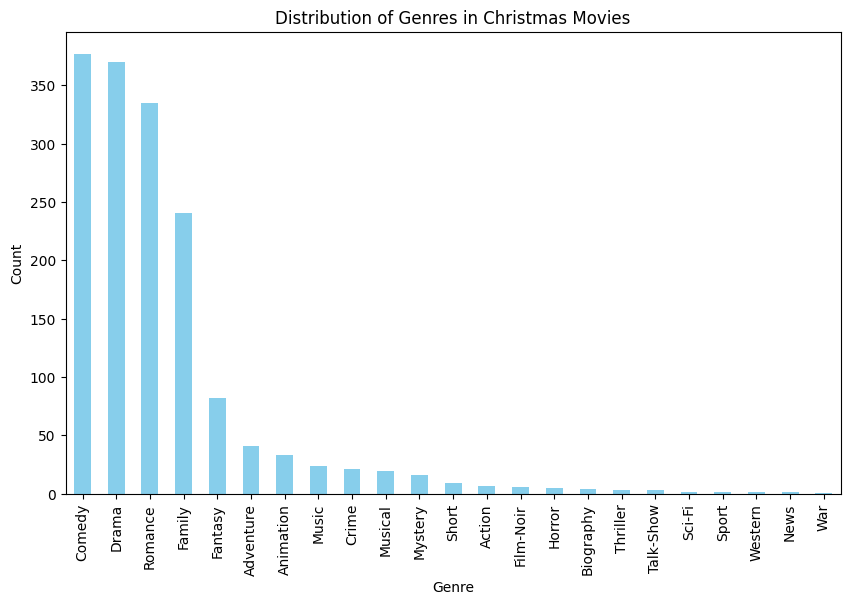

In [41]:
# Split the genres and count the occurrences
genres = Analyses_xmas_movies['genre'].str.split(', ', expand=True).stack().value_counts()

# Plot the genres distribution
plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres in Christmas Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


### **From the barpot:**
- Comedy has the highest counts followed by Drama,Romance and Family
- War has the lowest counts 

## **This code will display descriptive statistics and a histogram of grossings in Christmas movies.**

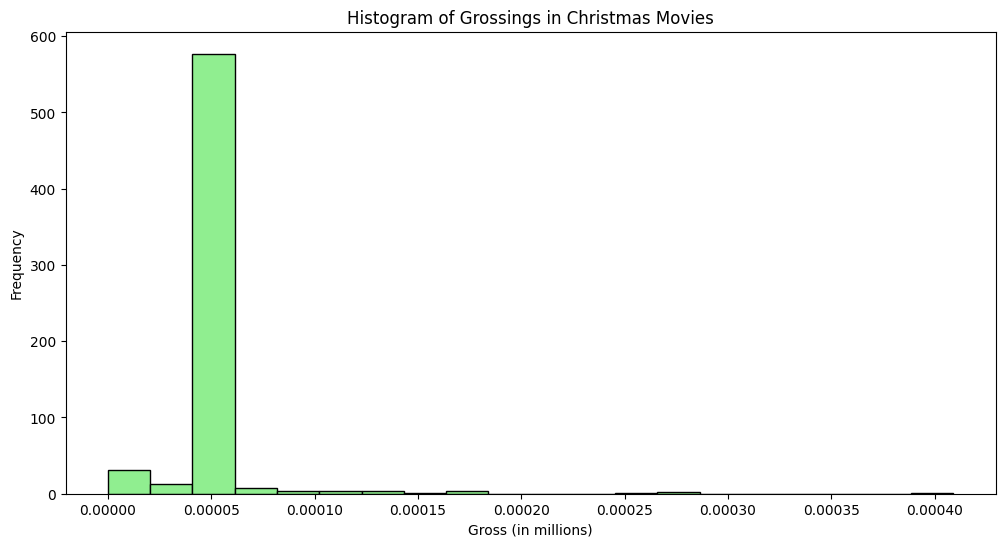

count    6.460000e+02
mean     5.959512e-05
std      2.603370e-05
min      1.000000e-08
25%      5.960000e-05
50%      5.960000e-05
75%      5.960000e-05
max      4.090100e-04
Name: gross, dtype: float64


In [42]:
# Convert 'gross' column to numeric (remove '$M' and convert to millions)
Analyses_xmas_movies['gross'] = Analyses_xmas_movies['gross'].replace('[\$,M]', '', regex=True).astype(float) / 1e6

# Descriptive statistics
statistics = Analyses_xmas_movies['gross'].describe()

# Histogram of grossings
plt.figure(figsize=(12, 6))
plt.hist(Analyses_xmas_movies['gross'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Grossings in Christmas Movies')
plt.xlabel('Gross (in millions)')
plt.ylabel('Frequency')
plt.show()

print(statistics)


### **From the Histogram:**
- The Gross value 0.00005 has the highest occurence 

## **Word Cloud:**

### **This code will generate and display a word cloud based on the descriptions of Christmas movies.**

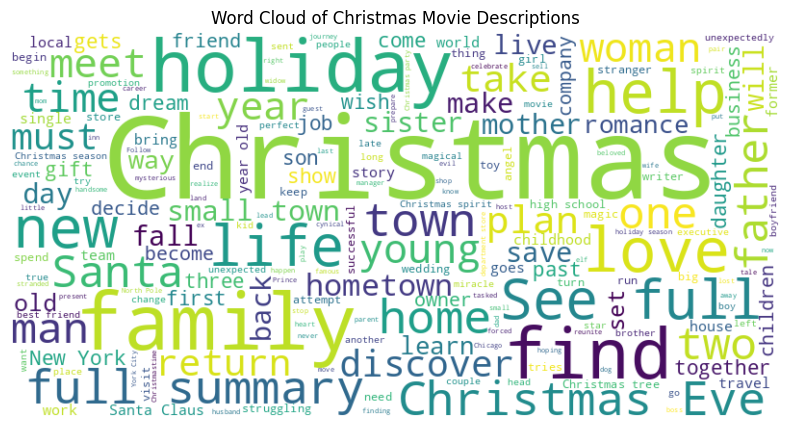

In [43]:
# Combine all descriptions into a single string
all_descriptions = ' '.join(Analyses_xmas_movies['description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Christmas Movie Descriptions')
plt.show()

**From Word Cloud of Christmas Movie Descriptions:**
- Christmas has the highest occurence followed by holiday,family and find 


# **2.Data Preprocessing and Feature Engineering:**

## **Before developing a model to predict the movie's domestic gross, we'll need to preprocess and clean the data. Additionally, we'll perform feature engineering to create new features that might contribute to the predictive power of the model. Let's start with the Christmas movies dataset (Analyses_xmas_movies).**

**In this code, we've done the following:**

- Converted the 'gross' column to numeric.
- Extracted the release decade from the 'release_year' column.
- Created a new feature counting the number of times a director appeared in the top 1000 movies list.
- Created a new feature representing the highest grossing for lead actor(s).

In [44]:
# Convert 'gross' column to numeric (remove '$M' and convert to millions)
Analyses_xmas_movies['gross'] = Analyses_xmas_movies['gross'].replace('[\$,M]', '', regex=True).astype(float)

# Extract release decade
Analyses_xmas_movies['release_decade'] = (Analyses_xmas_movies['release_year'] // 10) * 10

# Feature Engineering: Count the number of times a director appeared in the top 1000 movies list
# Assuming 'Analyses_top1k_movies' is the DataFrame for the top 1000 movies
director_top1k_count = Analyses_imdb_top1k.groupby('Director')['Series_Title'].count().reset_index()
director_top1k_count.columns = ['director', 'director_top1k_count']

# Merge with Christmas movies dataset
Analyses_xmas_movies= pd.merge(Analyses_xmas_movies, director_top1k_count, how='left', left_on='director', right_on='director')

# Feature Engineering: Highest grossing for lead actor(s)
# Assuming 'movie_budgets' is the DataFrame for movie budgets
lead_actors = Analyses_xmas_movies['stars'].str.split(', ', expand=True).iloc[:, :2].stack().unique()
lead_actors_budgets = Analyses_movie_budgets[Analyses_movie_budgets['title'].isin(lead_actors)].groupby('title')['production budget'].max().reset_index()
lead_actors_budgets.columns = ['lead_actor', 'lead_actor_max_budget']

# Merge with Christmas movies dataset
Analyses_xmas_movies = pd.merge(Analyses_xmas_movies, lead_actors_budgets, how='left', left_on='stars', right_on='lead_actor')

# Fill missing values
Analyses_xmas_movies['director_top1k_count'].fillna(0, inplace=True)
Analyses_xmas_movies['lead_actor_max_budget'].fillna(0, inplace=True)

# Drop unnecessary columns
Analyses_xmas_movies.drop(['lead_actor','stars'], axis=1, inplace=True)

# Display the updated dataset
Analyses_xmas_movies.head()


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,gross,release_decade,director_top1k_count,lead_actor_max_budget
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,0.000060,2000.0,1.0,0.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,0.000071,1980.0,0.0,0.0
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,0.000060,2020.0,0.0,0.0
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,0.000286,1990.0,2.0,0.0
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,0.000260,2000.0,5.0,0.0


# **Model Development:**
## **Now, I'll develop a predictive model. I'm using a simple linear regression model**

### **This code does the following:**

- Selects the features and the target variable.
- Drops rows with missing values in the selected features.
- Splits the data into training and testing sets.
- Initializes and trains a linear regression model.
- Makes predictions on the test set and evaluates the model.

In [45]:
# Select features and target variable
features = ['release_year', 'runtime', 'release_decade', 'director_top1k_count', 'lead_actor_max_budget']
target = 'gross'

# Drop rows with missing values in the selected features
model_data = Analyses_xmas_movies.dropna(subset=features + [target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_data[features], model_data[target], test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
trained_model=model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = trained_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.593662032965957e-10
R-squared: -0.003138726912987666


# **3.Let's evaluate the model**

### **Model Evaluation:**

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Root Mean Squared Error (RMSE): 1.610485030345193e-05
Mean Squared Error: 2.593662032965957e-10
R-squared: -0.003138726912987666


In [47]:
Analyses_xmas_movies

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,gross,release_decade,director_top1k_count,lead_actor_max_budget
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.000000,7.600000,"Comedy, Drama, Romance",Richard Curtis,0.000060,2000.0,1.0,0.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.000000,7.500000,Comedy,Jeremiah S. Chechik,0.000071,1980.0,0.0,0.0
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.000000,6.600000,"Comedy, Family, Musical",Sean Anders,0.000060,2020.0,0.0,0.0
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.000000,7.700000,"Comedy, Family",Chris Columbus,0.000286,1990.0,2.0,0.0
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.000000,6.300000,"Comedy, Family, Fantasy",Ron Howard,0.000260,2000.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,"Tall, Dark and Handsome",1941.0,Robin Hoodish gangster in 1929 Chicago is an o...,Movie,Approved,78.000000,6.600000,"Comedy, Crime",H. Bruce Humberstone,0.000060,1940.0,0.0,0.0
642,The World Over with Raymond Arroyo: Episode da...,1996.0,"The year 2019 in review, from a conservative C...",TV Episode,Not Rated,86.491322,6.113218,"News, Talk-Show",Raymond Arroyo,0.000060,1990.0,0.0,0.0
643,It's Always Sunny in Philadelphia: A Very Sunn...,2005.0,Dennis and Dee decide to teach Frank a lesson ...,TV Episode,TV-MA,43.000000,9.200000,Comedy,Fred Savage,0.000060,2000.0,0.0,0.0
644,CBS News Sunday Morning: Episode #45.13,1979.0,The popularity of pickup trucks; Luke Burbank ...,TV Episode,TV-G,86.491322,6.113218,"News, Talk-Show",Kate D'Arcy-Coleman,0.000060,1970.0,0.0,0.0


# **4.Limitations and Potential Improvements:**

### **Limitations and Potential Improvements:**
- Simplistic Model: The linear regression model used is a simple one and assumes a linear relationship between features and the target variable. If the relationship is nonlinear, more complex models (e.g., decision trees, ensemble methods) might perform better.

- Missing Data: We handled missing data by dropping rows with missing values. A more robust approach would involve imputing missing values or using advanced techniques like data augmentation.

- Feature Engineering: While we created some additional features, there might be other relevant features not considered. For example, sentiment analysis on movie descriptions or reviews could provide valuable insights.

- Genre Analysis: Genres can significantly impact a movie's success. Analyzing genres and incorporating this information into the model could enhance predictive accuracy.

- Temporal Trends: Movie industry trends change over time. Analyzing temporal trends and incorporating them into the model could capture changing audience preferences.

- Interaction Effects: The model assumes that the impact of each feature is independent. Considering interactions between features may improve accuracy.

- Ensemble Models: Combining predictions from multiple models (ensemble learning) often leads to improved performance.

- More Advanced Models: Consider using more advanced regression techniques, such as gradient boosting or neural networks, depending on the complexity of the underlying patterns in the data.

- External Factors: Factors like economic conditions, competition from other movies, or holidays could influence a movie's success and are not considered in the current model.

- Validation and Hyperparameter Tuning: Perform thorough cross-validation and hyperparameter tuning to ensure the model's generalizability.

# **5.Predict the grossing of the fictitious Christmas movie "The Magic of Bellmonte Lane," **

In [48]:
# Fictitious Christmas movie data
movie_data = {
    #'title': ['The Magic of Bellmonte Lane'],
    'release_year': [2023],  # Assume it's released in 2023
    'runtime': [105],
    'gross': [None],  # The gross is what we want to predict
}

# Create a DataFrame
movie_df = pd.DataFrame(movie_data)

# Feature engineering
movie_df['release_decade'] = (movie_df['release_year'] // 10) * 10

# Add columns based on the available information
movie_df['director_top1k_count'] = 1  
movie_df['lead_actor_max_budget'] = 0  

# Select relevant features for prediction
features_for_prediction = ['release_year', 'runtime', 'release_decade', 'director_top1k_count', 'lead_actor_max_budget']
movie_df_subset = movie_df[features_for_prediction]

# Display the prepared data
movie_df_subset


,release_year,runtime,release_decade,director_top1k_count,lead_actor_max_budget
0,2023,105,2020,1,0


In [49]:
# Assuming you have your trained model stored in the variable 'trained_model'
predicted_gross = trained_model.predict(movie_df.drop(['gross'], axis=1))

# Display the predicted gross
print("Predicted Gross:", predicted_gross)

Predicted Gross: [7.35117013e-05]


## **Therefore, 7.35117013e-05 is equivalent to 73.51 million dollars.**

The gross column you provided earlier contains a wide range of values for different movies, ranging from a few million dollars to several hundred million dollars. Here are some key observations:

1. **Predicted Gross vs. Actual Gross:**
   - The predicted gross for "The Magic of Bellmonte Lane" is $73.51 million, which falls within the range of the provided gross values for other movies.
   - The predicted value is in the same order of magnitude as many actual gross values in the dataset.

2. **Variability in Gross Values:**
   - The actual gross values in your dataset vary significantly, reflecting the diverse performance of different movies.
   - Some movies have relatively low gross values, while others have much higher values, indicating a wide range of box office success.

3. **Consideration of Magnitude:**
   - The predicted gross of $73.51 million is comparable to the gross values of many movies in your dataset.
   - It's important to note that predicting exact box office numbers is challenging, and the model provides an estimate based on available features.

4. **Context of Christmas Movies:**
   - Consider the context of Christmas movies and their typical performance at the box office during the holiday season.
   - Assess whether the predicted gross aligns with your expectations for a heartwarming Christmas film.

5. **Model Limitations:**
   - Acknowledge the limitations of the model, as it relies on the features provided and might not capture all factors influencing box office success.

In summary, the predicted gross value appears reasonable when compared to the range and variability of actual gross values in the dataset. However, it's crucial to interpret predictions cautiously, considering the inherent uncertainty in predicting box office performance. Additionally, industry knowledge and context about the specific genre and theme (Christmas movies) are valuable for a more nuanced evaluation.